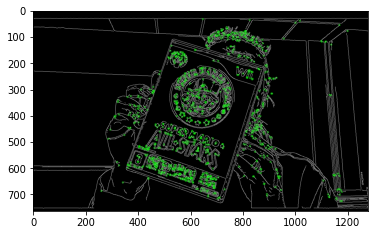

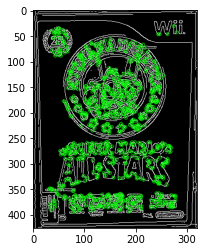

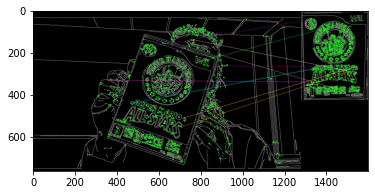

340


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def ORB_detector(new_image, image_template):
    edges0 = cv2.Canny(new_image,10,50)
    edges1 = cv2.Canny(image_template,10,50)
    
    orb = cv2.ORB_create(1000, 1.2, 2 , 31)  # ORB detector of 1000 keypoints, scaling pyramid factor=1.2
    # orb = cv2.ORB_create(1000, 1.2, 2 , 31) 340
    (kp1, des1) = orb.detectAndCompute(edges0, None)  # Detect keypoints on the new image
    (kp2, des2) = orb.detectAndCompute(edges1, None)  # Detect keypoints of the template image
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Matcher
    matches = bf.match(des1, des2)  # Extract matches
    matches = sorted(matches, key=lambda x: x.distance)  # Sort matches
    img2 = cv2.drawKeypoints(edges1, kp2, None, color=(0,255,0), flags=0)
    img1 = cv2.drawKeypoints(edges0, kp1, None, color=(0,255,0), flags=0)
    plt.imshow(img1)
    plt.show()
    plt.imshow(img2)
    plt.show()
    img3 = cv2.drawMatches(img1,
                      kp1,
                      img2,
                      kp2,
                      matches[:10],
                      None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3), plt.show()
    print( len(matches))


def HSV_detector(path_to_image):
    image = cv2.imread(path_to_image)
    # Convert the image from BGR to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for blue color in HSV
    lower_blue = np.array([120, 125, 100])
    upper_blue = np.array([150, 255, 255])

    # Define lower and upper bounds for red color in HSV
    lower_red = np.array([0, 100, 50])
    upper_red = np.array([10, 255, 255])

    # Define lower and upper bounds for yellow color in HSV
    lower_yellow = np.array([20, 100, 50])
    upper_yellow = np.array([40, 255, 255])

    # Threshold the image to extract blue objects
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Threshold the image to extract red objects
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    # Threshold the image to extract yellow objects
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Combine the masks to obtain the final mask
    final_mask = cv2.bitwise_or(cv2.bitwise_or(blue_mask, red_mask), yellow_mask)

    # Bitwise-AND the original image and the final mask to extract the objects
    extracted_objects = cv2.bitwise_and(image, image, mask=final_mask)
    
    return extracted_objects

def BLUR(path):
    image = cv2.imread(path)
    # Transfrom image to its gray-version for a better highlight of edges
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blurring Filter
    # Scanning using kernel_blurring by taking (average of each pixel)/9 with its neigbour ones
    kernel_blurring = np.array([
                                [1,1,1],
                                [1,1,1],
                                [1,1,1], 
                               ])/9 
    image_blurred = cv2.filter2D(image_gray, -1, kernel_blurring)
    # Edge Detection via Gradient
    image_gray_float = image_blurred #.astype(np.float32)
    return image_gray_float

image3 = BLUR("HisPelivideo.png")
image4 = BLUR("Pelivideo.png")

image = cv2.imread("Pelivideo.png") 
image2 = cv2.imread("HisPelivideo.png")

pelivideo = HSV_detector("Pelivideo.png")
hispelivideo = HSV_detector("HisPelivideo.png")

gray_pelivideo = cv2.cvtColor(pelivideo, cv2.COLOR_BGR2GRAY)
gray_hispelivideo = cv2.cvtColor(hispelivideo, cv2.COLOR_BGR2GRAY)

ORB_detector(image3,image4) 
# 337
# ORB_detector(gray_pelivideo,gray_hispelivideo)  294  matches
# ORB_detector(image, image2)   #320
# ORB_detector(pelivideo, hispelivideo)   #316
# ORB_detector(gray_pelivideo, gray_hispelivideo)  294

In [ ]:
import cv2

def detect_object_with_orb(input_image, template_image):
    # Convert images to grayscale
    gray_input = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    
    # Initialize ORB detector
    orb = cv2.ORB_create()
    
    # Find keypoints and descriptors
    keypoints_input, descriptors_input = orb.detectAndCompute(gray_input, None)
    keypoints_template, descriptors_template = orb.detectAndCompute(gray_template, None)
    
    # Create BFMatcher (Brute-Force Matcher)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    # Match descriptors
    matches = bf.match(descriptors_input, descriptors_template)
    
    # Apply ratio test
    good_matches = []
    for match in matches:
        if match.distance < 0.75 * min(matches, key=lambda x: x.distance).distance:
            good_matches.append(match)
    
    # Draw matches on input image
    output_image = cv2.drawMatches(input_image, keypoints_input, template_image, keypoints_template, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return output_image, len(good_matches)

# Load input image and template image
input_image = cv2.imread('Pelivideo.png')
template_image = cv2.imread('HisPelivideo.png')

# Perform object detection using ORB
output_image, num_matches = detect_object_with_orb(input_image, template_image)

# Display output image with matches
cv2.imshow('Object Detection with ORB', output_image)
print(f'Number of matches: {num_matches}')
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of matches: 0


In [ ]:
### Main

import numpy as np
import cv2
from matplotlib import pyplot as plt

def ORB_detector(new_image, image_template):
    edges0 = cv2.Canny(new_image,10,50, cv2.COLOR_BGR2GRAY)
    edges1 = cv2.Canny(image_template,10,50, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create(1000, 1.2)  # ORB detector of 1000 keypoints, scaling pyramid factor=1.2
    (kp1, des1) = orb.detectAndCompute(edges0, None)  # Detect keypoints on the new image
    (kp2, des2) = orb.detectAndCompute(edges1, None)  # Detect keypoints of the template image
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Matcher
    matches = bf.match(des1, des2)  # Extract matches
    matches = sorted(matches, key=lambda x: x.distance)  # Sort matches
    img2 = cv2.drawKeypoints(edges1, kp2, None, color=(0,255,0), flags=0)
    img1 = cv2.drawKeypoints(edges0, kp1, None, color=(0,255,0), flags=0)
    plt.imshow(img1)
    plt.show()
    return len(matches)

# Load video file and template image
cap = cv2.VideoCapture("HethenHisPelivideo.mp4")
image_template = cv2.imread('Pelivideo.png', 0)


# Initialize ROI coordinates
'''
For example, if top_left_x is 100, top_left_y is 50, bottom_right_x is 200, and bottom_right_y is 150, it means 
the top-left corner of the rectangle is at (100, 50) in the image, and the bottom-right corner is at (200, 150), 
creating a rectangle with width 100 and height 100.
'''
top_left_x, top_left_y, bottom_right_x, bottom_right_y = 0, 0, 0, 0



while True:
    # Get webcam images
    ret, frame = cap.read()

    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = int(height / 2)
    top_left_y = int((height / 2) + (height / 4))
    bottom_right_x = int((width / 3) * 2)
    bottom_right_y = int((height / 2) - (height / 4))

    # Draw rectangular window for our region of interest
    # cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), 255, 3)

    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)

    # Get number of ORB matches 
    matches = ORB_detector(cropped, image_template)

    # Display status string showing the current no. of matches 
    output_string = "Matches = " + str(matches)
    cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)

    # Our threshold to indicate object deteciton
    # For new images or lightening conditions you may need to experiment a bit 
    # Note: The ORB detector to get the top 1000 matches, 350 is essentially a min 35% match
    threshold = 336

    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
        # Display the frame with the detected object
        cv2.imshow('Object Detector using ORB', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()